# Solve a simple kinetic

Let's create a simple kinetic.

## Create model

First we import the Kinetic Solver Interface:

In [1]:
import numpy as np
from scifit.interfaces.kinetics import KineticSolverInterface
from IPython.display import display, Math

And we configure it in order to represent the following dynamic system:
$$
\begin{eqnarray}
1A + 1B &  \overset{\beta_{0}}{\rightarrow}  & 1C \\
1B + 1C &  \overset{\beta_{1}}{\rightarrow}  & 1D
\end{eqnarray}
$$

In [2]:
kinetic = KineticSolverInterface(
    nur=np.array(
        [
            [-1, -1, 1, 0],
            [0, -1, -1, 1],
        ]
    ),
    x0=np.array([3e-3, 8e-3, 1e-3, 1e-7]),
    k0=np.array([2.1, 5e-1]),
)

We can confirm we have encoded the right system:

In [3]:
display(Math(kinetic.model_equations()))

<IPython.core.display.Math object>

## Solve system

We create the time domain we want the system to be solved on:

In [4]:
t = np.linspace(0., 1500., 5001)

Then we simply fit:

In [5]:
solution = kinetic.integrate(t)

Returned solution is satisfying:

In [6]:
solution

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.000e-01 ...  1.500e+03  1.500e+03]
        y: [[ 3.000e-03  2.985e-03 ...  5.167e-07  5.161e-07]
            [ 8.000e-03  7.984e-03 ...  1.627e-03  1.627e-03]
            [ 1.000e-03  1.014e-03 ...  6.264e-04  6.263e-04]
            [ 1.000e-07  1.307e-06 ...  3.373e-03  3.373e-03]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001DF93028F40>
 t_events: None
 y_events: None
     nfev: 269
     njev: 0
      nlu: 0

## Rendering solution

We can assess rates and concentrations:

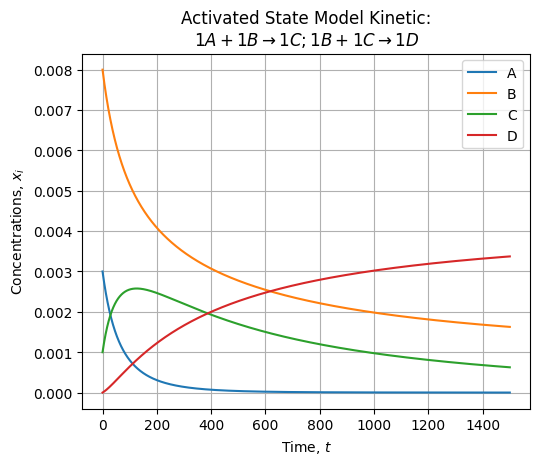

In [7]:
axe = kinetic.plot_solve()

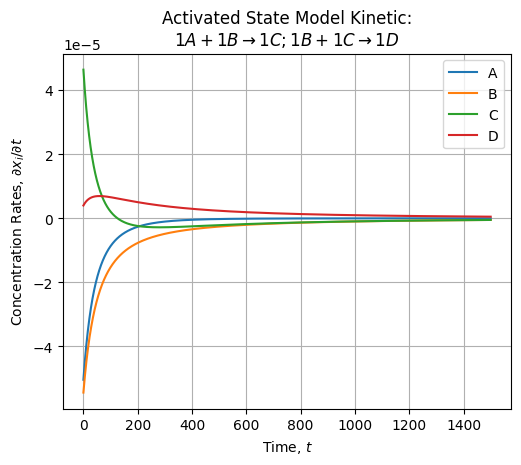

In [8]:
axe = kinetic.plot_rates()

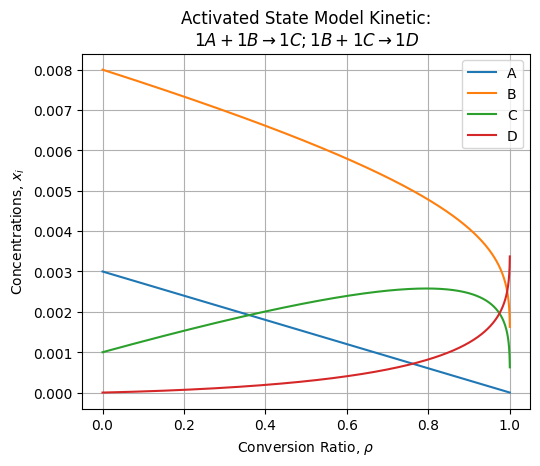

In [9]:
axe = kinetic.plot_solve_ratio()

But also substances yields:

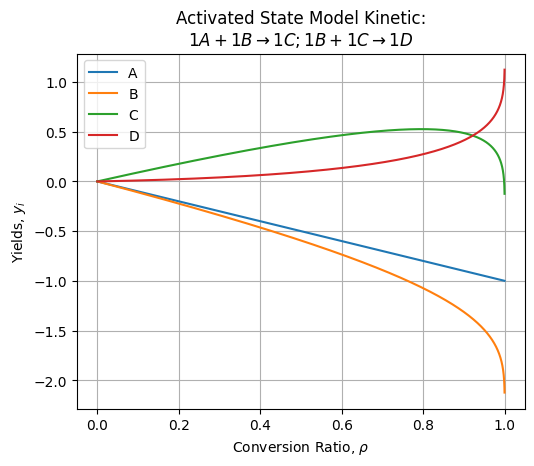

In [10]:
axe = kinetic.plot_yields()

Reaction quotients:

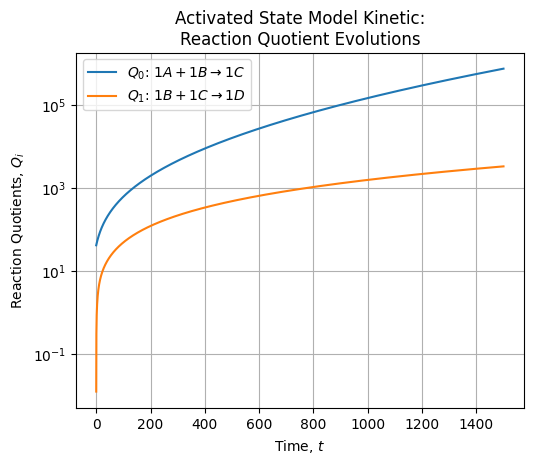

In [11]:
axe = kinetic.plot_quotients()

Intantaneous & global selectivities:

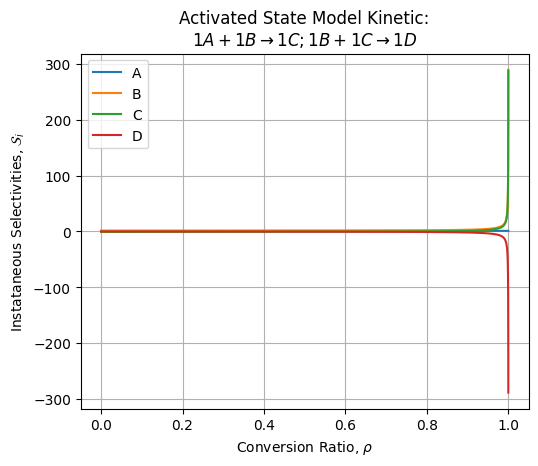

In [12]:
axe = kinetic.plot_selectivities()

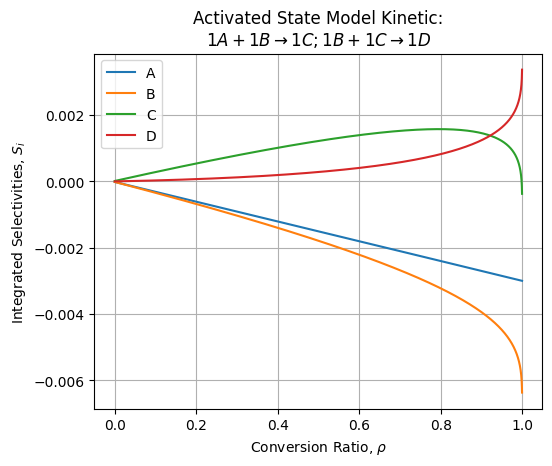

In [13]:
axe = kinetic.plot_global_selectivities()

Levenspiel diagrams:

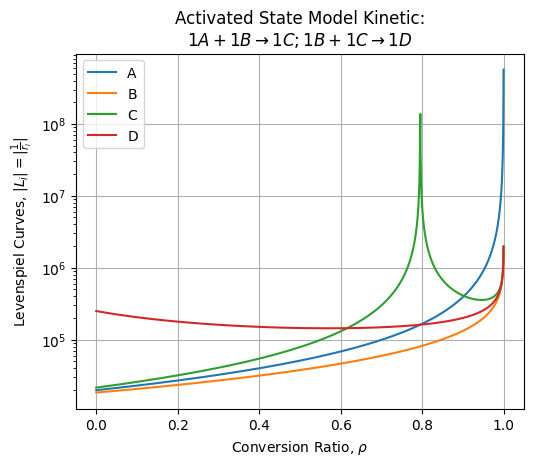

In [14]:
axe = kinetic.plot_levenspiel()

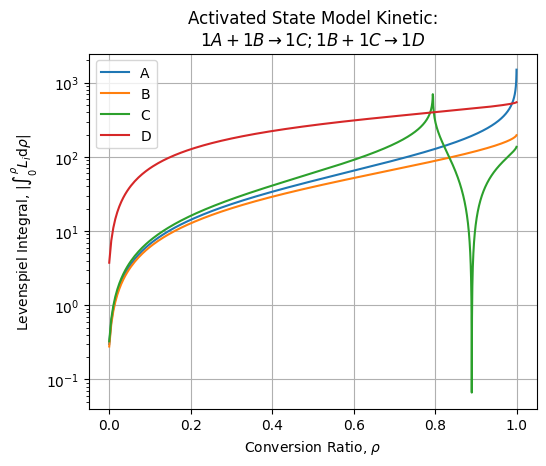

In [15]:
axe = kinetic.plot_integrated_levenspiel()